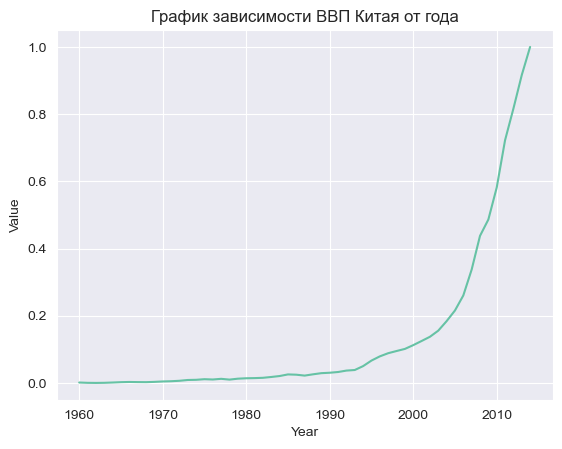

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

PATH = "china_gdp.csv"
DATASET_SIZE = 1300
dataset = pd.read_csv(PATH)
dataset = dataset.head(DATASET_SIZE)

param1 = "Year"
param2 = "Value"

def normalize(column: pd.DataFrame):
    return (column - column.min()) / (column.max() - column.min())

# dataset[param1] = normalize(dataset[param1])
dataset[param2] = normalize(dataset[param2])

sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.lineplot(
 x=dataset[param1],
 y=dataset[param2],
)
plt.title('График зависимости ВВП Китая от года')
plt.xlabel(param1)
plt.ylabel(param2)
plt.show()

Среднеквадратическая ошибка = 0.001979690152569885


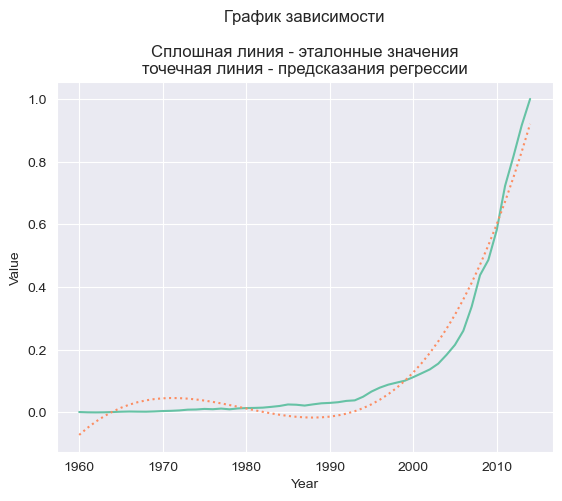

In [21]:
x = np.array(dataset[param1]).reshape(-1, 1)
y = np.array(dataset[param2]).reshape(-1, 1)

DEGREES = 5
regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')


sns.lineplot(
 x=dataset[param1],
 y=dataset[param2],
 linestyle="solid"
)
sns.lineplot(
 x=dataset[param1],
 y=predictions.reshape(-1),
 linestyle="dotted"
)
plt.title(
 'График зависимости\n\n'
 'Сплошная линия - эталонные значения\n'
 'точечная линия - предсказания регрессии'
)
plt.xlabel(param1)
plt.ylabel(param2)
plt.show()

In [111]:
x_parameters = np.append(
 regression['linearregression'].intercept_[0],
 regression['linearregression'].coef_[0][1:]
)

eq = ''
for index, param in enumerate(x_parameters):
    eq = eq + str(param) + '*x^' + str(index) + ' + '

eq[0:-3]

'-0.003287007303821421*x^0 + 0.22519208990136697*x^1 + -2.3643842167216294*x^2 + 9.862716148011467*x^3 + -16.43542809503181*x^4 + 9.766055343860149*x^5'